# Network Analysis Practice

#### Alexey Machikhin

1. I use data parsed from VK social media using request package. The data contains information on my VK friends. Hence, from the data parsed (lists of all friends of a single friend that I have in VK), I created an adjacency matrix.

2. I use `networkx` Python packages.

3. The taska are to calculate the following network metrics:
    * Number of nodes and edges
    * Clustering metrics
    * Distance metrics
    * Centrality metrics
    * Any other metrics you may need

4. Here I  analyze the obtained results for my network. Present the tables with node centrality values.

5. Finally I draw the network and customize the figure to be comprehensible (colors, font sizes, etc).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%config InlineBackend.figure_format = 'svg'

In [5]:
friends_df = pd.read_hdf('friends_df.h5.gz')

In [6]:
friends_df.head() # adjacency matrix is read correctly

212        305        804        1221       1340       2050       \
212           0          0          0          0          0          0   
305           0          0          0          0          0          0   
804           0          0          0          0          0          0   
1221          0          0          0          0          0          0   
1340          0          0          0          0          0          0   

      2786       3052       3327       4206       ...  710766698  711727384  \
212           0          0          0          0  ...          0          0   
305           0          0          0          0  ...          0          0   
804           0          0          0          0  ...          0          0   
1221          0          0          0          0  ...          0          0   
1340          0          0          0          0  ...          0          0   

      711990273  712398265  713532804  713718801  713871738  714437355  \
212           0          0          0          0          0          0   
305           0          0          0          0          0          0   
804           0          0          0          0          0          0   
1221          0          0          0          0          0          0   
1340          0          0          0          0          0          0   

      716436309  729733790  
212           0          0  
305           0          0  
804           0          0  
1221          0          0  
1340          0          0  

[5 rows x 8960 columns]

In [7]:
friends_net = nx.from_pandas_adjacency(friends_df)

### N of nodes and edges

In [8]:
friends_net.number_of_nodes()

8960

In [9]:
friends_net.number_of_edges()

10572

### Clustering metrics

In [11]:
#nx.clustering(friends_net)

In [12]:
nx.average_clustering(friends_net)

0.038853669361675516

In [13]:
nx.transitivity(friends_net)

0.002366765937279461

### Distance metrics

In [14]:
ecc = nx.eccentricity(friends_net)

In [15]:
#ecc

In [16]:
nx.diameter(friends_net, ecc)

4

In [17]:
nx.radius(friends_net, ecc)

2

In [18]:
nx.average_shortest_path_length(friends_net)

3.77126029491493

### Centrality metrics

In [20]:
degree = nx.degree_centrality(friends_net)

<AxesSubplot:ylabel='Count'>

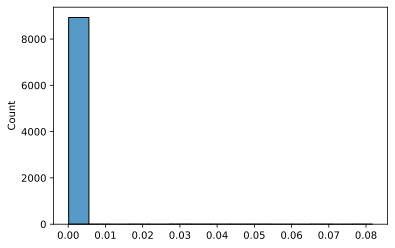

In [21]:
sb.histplot(degree)

In [22]:
clos = nx.closeness_centrality(friends_net)

<AxesSubplot:ylabel='Count'>

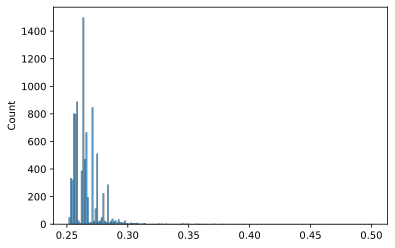

In [23]:
sb.histplot(clos)

In [24]:
bet = nx.betweenness_centrality(friends_net, k=True) # I use approximate algorithm because the initial graph is too large

<AxesSubplot:ylabel='Count'>

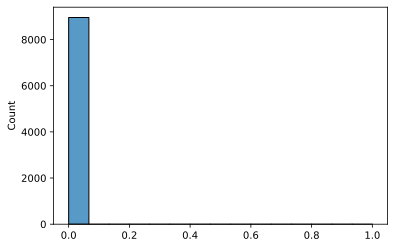

In [25]:
sb.histplot(bet)

In [26]:
page = nx.pagerank(friends_net)

In [28]:
#page

### Density

In [29]:
nx.density(friends_net)

0.0002634023248768198

**Let's analyse the initial network based on three common network typology measures: degree destribution, averege geodesic and clustering coefficient.**

1. *Degree destribution:*
- Most nodes are equally degreed across the network, however some of them have high closness centrality.
2. *Averege geodesic:*
- Average shortest path length is 3.77. This means that the number of steps along the shortest path between two nodes, averaged for all possible pairs of nodes is not large. And many nodes maybe connected through certain people.
3. *Clustering coefficient:*
- Averege clustering coefficient is 0.03. This means that many nodes may be thightly knit, but mot separeted by communities. However, this number is not so small to say that we have a random graph in this case. Thus, it is expected that there will be separete clusters of VK friends.

### Graph

- I use Fruchterman-Reingold force-directed layout algorithm for better graph drawing.

In [33]:
pos = nx.spring_layout(friends_net)

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
nx.draw_networkx(friends_net, 
                 with_labels=False, 
                 node_size=[v * 2500 for v in degree.values()], 
                 node_color='indigo', 
                 pos=pos, 
                 width=.1)
plt.savefig("VK friends graph.svg", format="SVG")

- Even without community detection methods, it can be clearly seen that all VK friends are seperated by different clusters.
- The bigger node, the higher degree centrality. So that communities of VK friends are formed around one popular person.
- Some commuties are located far from the giant component. But the common thing is that these communities are connected with the giant component through some people who know the most popular person in separete communities.
- Also separete communities are connected throug these people who are driends of nodes with the highes degree centrality.
- The giant component consists of different clusters. These communities organize the giant component as many people with the highest degree centrality (hearts of these clusters) are friends to each other. 